In [55]:
from sklearn.model_selection import train_test_split
import pandas as pd
from lem2Alg import *
from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt


In [56]:
columns = ["age", "sex", "chest_pain", "blood_presure", "cholestoral", "blood_sugar", "rer", "max_heart_rate", "exercise_angina", "oldpeak", "slope_of_peak", "major_vessels", "thal", "oc"]

df = pd.read_csv("heartdisease.txt", sep=" ", names=columns)
df.head()

,age,sex,chest_pain,blood_presure,cholestoral,blood_sugar,rer,max_heart_rate,exercise_angina,oldpeak,slope_of_peak,major_vessels,thal,oc
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [57]:
df["oc"] = df["oc"].replace(1, 0)
df["oc"] = df["oc"].replace(2, 1)

In [58]:
df.isnull().sum()

age                0
sex                0
chest_pain         0
blood_presure      0
cholestoral        0
blood_sugar        0
rer                0
max_heart_rate     0
exercise_angina    0
oldpeak            0
slope_of_peak      0
major_vessels      0
thal               0
oc                 0
dtype: int64

In [59]:
df['oc'].value_counts()

0    150
1    120
Name: oc, dtype: int64

In [60]:
for item in df.columns:
    print(df[item].unique(), " ** ", item)

[70. 67. 57. 64. 74. 65. 56. 59. 60. 63. 53. 44. 61. 71. 46. 40. 48. 43.
 47. 54. 51. 58. 66. 37. 50. 42. 62. 49. 52. 45. 41. 76. 39. 35. 55. 34.
 38. 69. 68. 77. 29.]  **  age
[1. 0.]  **  sex
[4. 3. 2. 1.]  **  chest_pain
[130. 115. 124. 128. 120. 110. 140. 150. 135. 142. 134. 112. 132. 138.
 160. 170. 144. 122. 152. 101. 126. 118. 136. 105. 174. 145. 108. 156.
 106. 104.  94. 146. 148. 178. 125. 100. 165. 180. 158. 200. 117. 192.
 123. 129. 102. 155. 172.]  **  blood_presure
[322. 564. 261. 263. 269. 177. 256. 239. 293. 407. 234. 226. 235. 303.
 149. 311. 203. 211. 199. 229. 245. 204. 288. 275. 243. 295. 230. 265.
 228. 215. 326. 200. 207. 273. 180. 222. 223. 209. 233. 197. 218. 246.
 225. 315. 205. 417. 195. 198. 166. 178. 249. 281. 126. 305. 240. 276.
 319. 242. 260. 354. 309. 208. 236. 270. 214. 201. 244. 306. 221. 330.
 266. 206. 212. 302. 313. 141. 237. 289. 254. 274. 258. 160. 327. 304.
 271. 283. 188. 286. 360. 267. 196. 232. 277. 210. 213. 282. 167. 224.
 268. 250. 219. 217.

In [61]:
df.describe()

,age,sex,chest_pain,blood_presure,cholestoral,blood_sugar,rer,max_heart_rate,exercise_angina,oldpeak,slope_of_peak,major_vessels,thal,oc
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [62]:
model = lem2Classifier()

X = df.drop(['oc'], axis=1)
y = df['oc']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
model_l2 = model.fit(X_train, y_train)
l2_predict = model.predict(X_test)
l2_conf_matrix = confusion_matrix(y_test, l2_predict)
l2_acc_score = accuracy_score(y_test, l2_predict)
print("confussion matrix")
print(l2_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",l2_acc_score*100,'\n')
print(classification_report(y_test,l2_predict))

The columns have too little diversity. Try to increase it using feature engineering.
The columns have too little diversity. Try to increase it using feature engineering.
The columns have too little diversity. Try to increase it using feature engineering.
The columns have too little diversity. Try to increase it using feature engineering.
The columns have too little diversity. Try to increase it using feature engineering.
The columns have too little diversity. Try to increase it using feature engineering.
The columns have too little diversity. Try to increase it using feature engineering.
The columns have too little diversity. Try to increase it using feature engineering.
The columns have too little diversity. Try to increase it using feature engineering.
The columns have too little diversity. Try to increase it using feature engineering.
The columns have too little diversity. Try to increase it using feature engineering.
The columns have too little diversity. Try to increase it using f

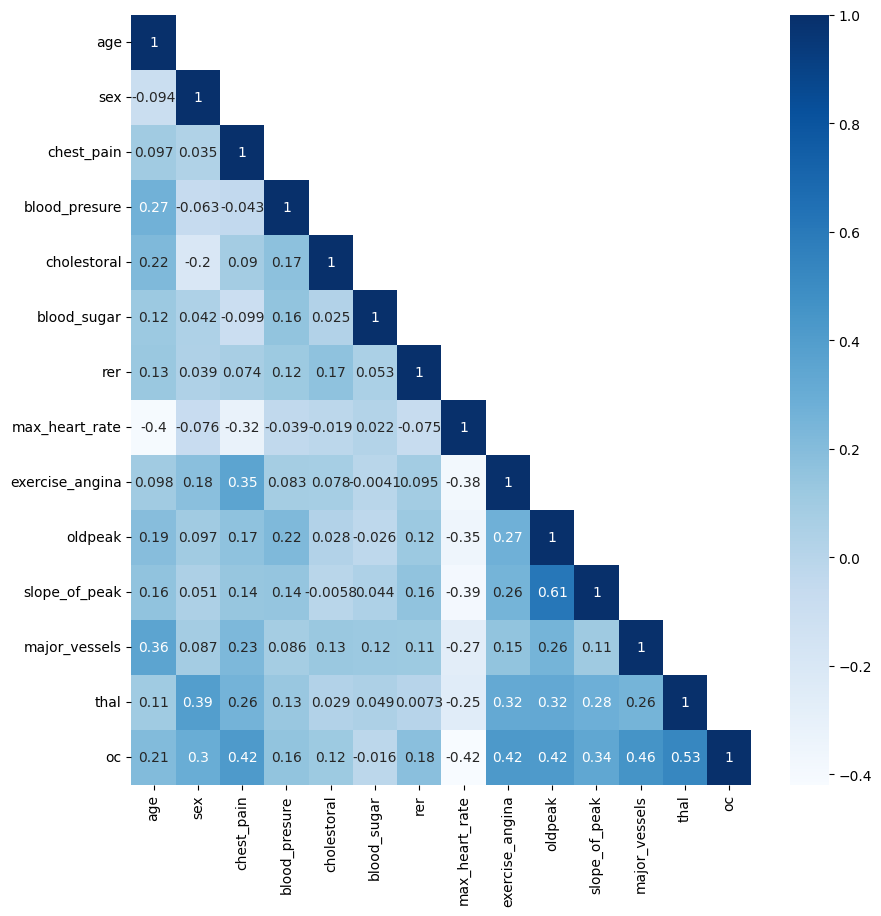

In [65]:
import seaborn as sns
corr = df.corr()

# Get the upper triangle of the correlation matrix
upper_corr = corr.where(np.tril(np.ones(corr.shape)).astype(bool))

# Create the heat map
plt.figure(figsize=(10, 10))
sns.heatmap(upper_corr, cmap='Blues', annot=True)
plt.show()

OC - most correlated with: thal, major_vessels, slope_of_peak, excercise_angina, chest_pain \
moderately correlated: age, sex, blood_preure, chorestoral, rer \
negativly most corellated: max_heart_rate

thal: sex, exercise_angina, oldpeak, chest pain, slope_of_peak, max_heart_rate \
major_vessels: age, chest_pain, max_heart_rate, oldpeak \
slope_of_peak: max_heart_rate, oldpeak, excercise_angina \
oldpeak: excercise_angina, max_heart_rate, blood_presure \
excercise_angina: chest_pain, max_heart_rate \
\
age: major_vessels, max_heart_rate, chorestoral, blood_presure \
sex: thal, chorestoral \
blood_presure: \
rer: \
\
max_heart_rate: age, chest_pain, thal, major_vessels, oldpeak, slope_of_peak, exercise_angina

In [66]:
class_0 = df[df['oc'] == 0]
class_1 = df[df['oc'] == 1]

from sklearn.utils import resample
spam_upsample = resample(class_1,
             replace=True,
             n_samples=len(class_0),
             random_state=42)

df = pd.concat([class_0, spam_upsample])
df = df.sample(frac=1).reset_index(drop=True)

In [67]:
df['thal_sex'] = df['thal'] * df['sex']
df['thal_exercise_angina'] = df['thal'] * df['exercise_angina']
df['thal_oldpeak'] = df['thal'] * df['oldpeak']
df['thal_chest_pain'] = df['thal'] * df['chest_pain']
df['thal_slope_of_peak'] = df['thal'] * df['slope_of_peak']
df['thal_max_heart_rate'] = df['thal'] * df['max_heart_rate']

df['major_vessels_age'] = df['major_vessels'] * df['age']
df['major_vessels_chest_pain'] = df['major_vessels'] * df['chest_pain']
df['major_vessels_max_heart_rate'] = df['major_vessels'] * df['max_heart_rate']
df['major_vessels_oldpeak'] = df['major_vessels'] * df['oldpeak']

df['slope_of_peak_oldpeak'] = df['slope_of_peak'] * df['oldpeak']
df['slope_of_peak_max_heart_rate'] = df['slope_of_peak'] * df['max_heart_rate']
df['slope_of_peak_excercise_angina'] = df['slope_of_peak'] * df['exercise_angina']

df['oldpeak_blood_presure'] = df['oldpeak'] * df['blood_presure']
df['oldpeak_max_heart_rate'] = df['oldpeak'] * df['max_heart_rate']
df['oldpeak_excercise_angina'] = df['oldpeak'] * df['exercise_angina']

df['excercise_angina_chest_pain'] = df['exercise_angina'] * df['chest_pain']
df['excercise_angina_max_heart_rate'] = df['exercise_angina'] * df['max_heart_rate'] 

df['max_heart_rate_age'] = df['max_heart_rate'] * df['age']
df['max_heart_rate_chest_pain'] = df['max_heart_rate'] * df['chest_pain'] 

In [68]:
model = lem2Classifier()

X = df.drop(['oc'], axis=1)
y = df['oc']


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [70]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
scores, sens, spec, pre, aucs = [], [], [], [], []
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(y_pred)
    predictions_series = pd.Series(y_pred)
    # Calculate the F1 score
    sensitivity = recall_score(y_test.astype(int), predictions_series.astype(int), pos_label=1)
    sens.append(sensitivity)
    specificity = recall_score(y_test.astype(int), predictions_series.astype(int), pos_label=0)
    spec.append(specificity)
    precision = precision_score(y_test.astype(int), predictions_series.astype(int)) 
    pre.append(precision)
    f1 = f1_score(y_test, y_pred)
    scores.append(f1)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

{'thal_chest_pain': 84, 'thal_slope_of_peak': 67, 'max_heart_rate': 16, 'oc': 168, 'chest_pain': 123, 'age': 27, 'thal_oldpeak': 14, 'thal': 91, 'sex': 80, 'cholestoral': 75, 'exercise_angina': 94, 'thal_exercise_angina': 63, 'slope_of_peak_excercise_angina': 56, 'excercise_angina_chest_pain': 67, 'excercise_angina_max_heart_rate': 44, 'slope_of_peak': 40, 'major_vessels': 57, 'thal_max_heart_rate': 20, 'major_vessels_age': 38, 'major_vessels_chest_pain': 42, 'major_vessels_max_heart_rate': 30, 'oldpeak': 16, 'slope_of_peak_oldpeak': 13, 'oldpeak_blood_presure': 7, 'oldpeak_max_heart_rate': 7, 'thal_sex': 37, 'oldpeak_excercise_angina': 36, 'major_vessels_oldpeak': 36, 'slope_of_peak_max_heart_rate': 5, 'max_heart_rate_chest_pain': 4, 'blood_presure': 17, 'max_heart_rate_age': 6, 'rer': 3, 'blood_sugar': 3}
[True, False, False, False, True, True, True, True, False, False, False, True, False, True, True, False, False, False, True, False, False, False, True, True, False, True, False, Fal

Average F1 score: 0.7728701570233827
Average AUC: 0.7733333333333332
Average sens score: 0.7733333333333332
Average spec score: 0.7733333333333334
Average prec score: 0.7776376319758673


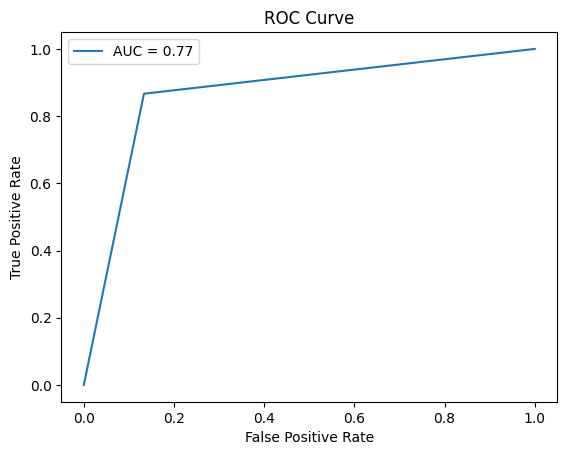

' \nAverage F1 score: 0.7507449817153409\nAverage AUC: 0.7633333333333333\nAverage sens score: 0.7333333333333333\nAverage spec score: 0.7933333333333333\nAverage prec score: 0.7877264183185236 '

In [71]:
# Print the average F1 score
print("Average F1 score:", np.mean(scores))
average_auc = sum(aucs) / len(aucs)
print('Average AUC:', average_auc)
print("Average sens score:", np.mean(sens))
print("Average spec score:", np.mean(spec))
print("Average prec score:", np.mean(pre))

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = %0.2f' % average_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
''' 
Average F1 score: 0.7507449817153409
Average AUC: 0.7633333333333333
Average sens score: 0.7333333333333333
Average spec score: 0.7933333333333333
Average prec score: 0.7877264183185236 '''

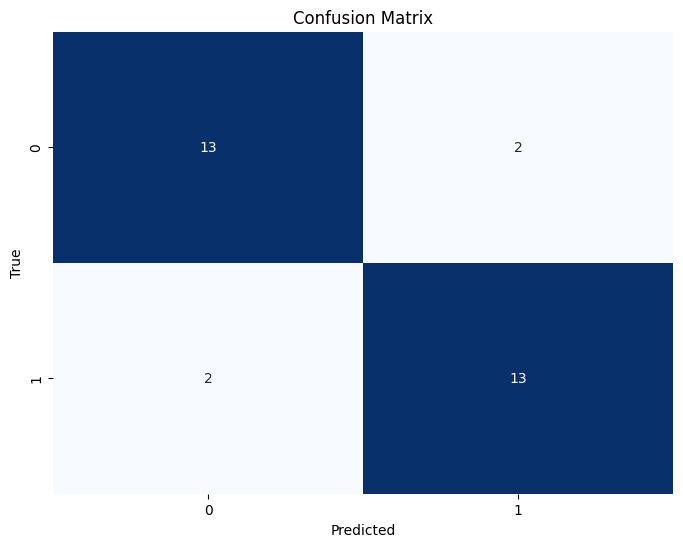

In [72]:
import seaborn as sns
xd = confusion_matrix(y_test.astype(int), predictions_series.astype(int), labels=model.decision_variables)
plt.figure(figsize=(8, 6))
sns.heatmap(xd, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()